# **Personalized Medicine Recommendation Using AI**


####This project aims to recommend the most suitable type of medicine (Oral, Injectable, Topical, etc.) based on user input such as medical reason and description. We apply Natural Language Processing (NLP) techniques and supervised learning models to predict the drug type from text data.

####We compare the performance of multiple models and evaluate them using classification metrics and confusion matrices.



## **Step 1: Import Libraries and Load Dataset**

####In this step, we import all the necessary libraries required for data processing, visualization, and machine learning tasks.

####Libraries provide the tools we need to manipulate the data, build models, and evaluate performance. Without them, it would be difficult to perform tasks such as vectorization, model training, and plotting.

####We load the dataset into a pandas DataFrame and install relevant Python packages that support machine learning (e.g., scikit-learn, seaborn).


In [ ]:
# !pip install pandas_profiling
!pip install ydata_profiling
# !pip install missingno

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

%matplotlib inline
import numpy as np
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

from ydata_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=74ad02226d81251e43966cdc882d17d1d8fbb26fb626cd2817ac5c7742087681
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
     

In [ ]:
df = pd.read_csv('/content/medicine.csv')
df

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...
...,...,...,...,...
9715,9716,T Muce Ointment 5gm,Wound,used for treating warts
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,Wound,used to soften the skin cells
9717,9718,Wokadine M Onit 10gm,Wound,used for scars
9718,9719,Wound Fix Solution 100ml,Wound,used for wounds


## **Step 2: Data Overview and Cleaning**


***
## 💡 Pandas profiling:
***

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#d9ecd0;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:DarkSlateGray;">Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available
</p>
</div>


In [ ]:
# Pandas profiling
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00,  8.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#  Display the top 5 observations of the dataset
df.head()

,df_index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [ ]:
# Display the last 5 observations of the dataset
df.tail()

,df_index,Drug_Name,Reason,Description
9715,9716,T Muce Ointment 5gm,Wound,used for treating warts
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,Wound,used to soften the skin cells
9717,9718,Wokadine M Onit 10gm,Wound,used for scars
9718,9719,Wound Fix Solution 100ml,Wound,used for wounds
9719,9720,Wounsol Ointment 15gm,Wound,used to treat and remove raised warts (usually...


***
## **About Features**
***
| <p style="text-align: center; color:LightCoral; font-size:130%;">Name</p> |<p style="text-align: center; color:LightCoral; font-size:130%;">Description</p>  |
|------|------|
|**Drug_Name**|<p style="text-align:center;"> Name of the medicine prescribed.</p>
|**Reason**|<p style="text-align:center;"> The medical reason or symptom for which the drug is prescribed (e.g., Acne, Headache, Infection).</p>
|**Description**|<p style="text-align:center;">A longer text explaining the patient's condition or purpose of the drug.</p>
|**Drug_Type**|<p style="text-align:center;">The category/type of the drug (Oral, Injectable, Topical, Liquid, Other). This is the target variable.</p>

In [ ]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print("The number of rows is: ", n_rows)
print("The number of columns is: ", n_cols)

The number of rows is:  9720
The number of columns is:  4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   df_index     9720 non-null   int64 
 1   Drug_Name    9720 non-null   object
 2   Reason       9720 non-null   object
 3   Description  9720 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


In [ ]:
# Checking some information of data
def check_data(df):
    List = []
    columns = df.columns
    for cols in columns:
        null_val = df[cols].isnull().sum()
        unique_val = df[cols].nunique()
        dtypes = df[cols].dtypes
        List.append([cols, null_val, unique_val, dtypes])
    df_check = pd.DataFrame(List)
    df_check.columns = ["columns", "null_val", "unique_val", "dtypes"]
    return df_check


check_data(df)

,columns,null_val,unique_val,dtypes
0,df_index,0,9720,int64
1,Drug_Name,0,9626,object
2,Reason,0,50,object
3,Description,0,290,object


In [ ]:
df.dropna(subset=['Reason', 'Description'], inplace=True)

<Axes: >

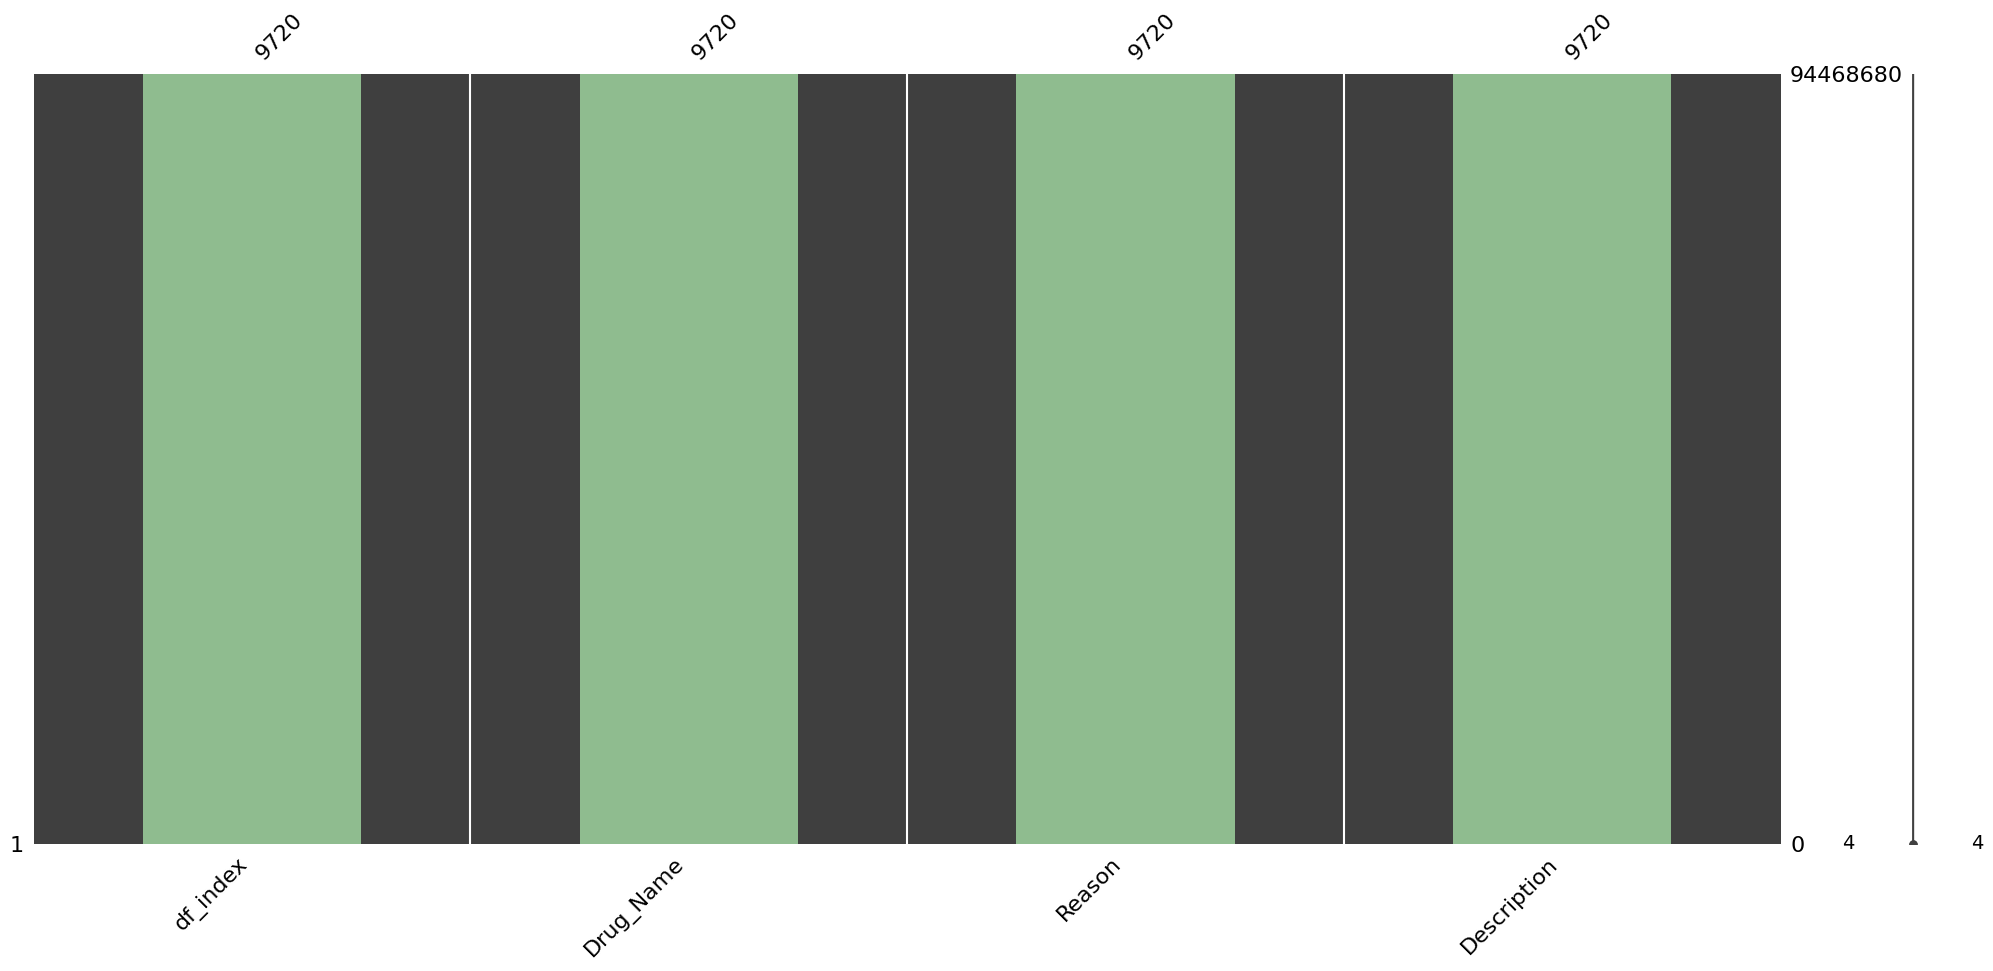

In [ ]:
# Checking the missing value
msno.matrix(df)
msno.bar(df, color="DarkSeaGreen")

***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite; font-size:85%; text-align:left">

<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>


####-  As you can see we don't have missing value.
    
***

# **Step 3: Statistics summary**
***


####**Statistics Summary** generates key numerical insights about the dataset, including measures like the mean, standard deviation, minimum/maximum values, and percentiles.

#### We use this summary to understand the distribution of data, detect potential outliers, and verify the integrity of the data. It helps identify any erroneous or extreme values that could affect model training.

In [ ]:
# Check for Duplication
print("The number of duplicated value in data:\n", df.duplicated().sum())

The number of duplicated value in data:
 0


In [ ]:
# Get a summary from dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
df_index,9720.0,4860.5,2806.066642,1.0,2430.75,4860.5,7290.25,9720.0


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Drug_Name,9720,9626,Zovir 400mg Tablet 10'SZovir 200mg Tablet 10'S...,2
Reason,9720,50,Hypertension,2505
Description,9720,290,lower high blood pressure (hypertension),578


***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite ; font-size:85%; text-align:left">

<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>

####🔸 There are a total of **9720 rows** in the dataset and **no duplicate entries** were found. <br>
####🔸 The Drug_Name column has **9626 unique values**, indicating a large variety of medicines in the dataset.<br>
####🔸 The most common Reason for medication is **Hypertension**, with **2505 occurrences**.<br>
####🔸 The Description column contains **290 unique** descriptions — with the most frequent being **"lower high blood pressure (hypertension)"**, occurring **578 times**.<br>
####🔸 The numerical index ranges from **1 to 9720**, confirming proper row indexing without missing data.<br>
####🔸 This summary gives a good overview of how balanced or skewed the text features might be before vectorization.

</div>

***

## **Step 4:  Exploratory Data Analysis (EDA)**

####**Exploratory Data Analysis (EDA)** is the process of visually and statistically exploring the dataset to identify patterns, trends, and distributions before model building.

####EDA helps us understand the underlying structure of the data, uncover potential issues (e.g., outliers, class imbalance), and inform the next steps in data preprocessing. It’s a key step to ensure that we have a clear understanding of the data before applying machine learning techniques.

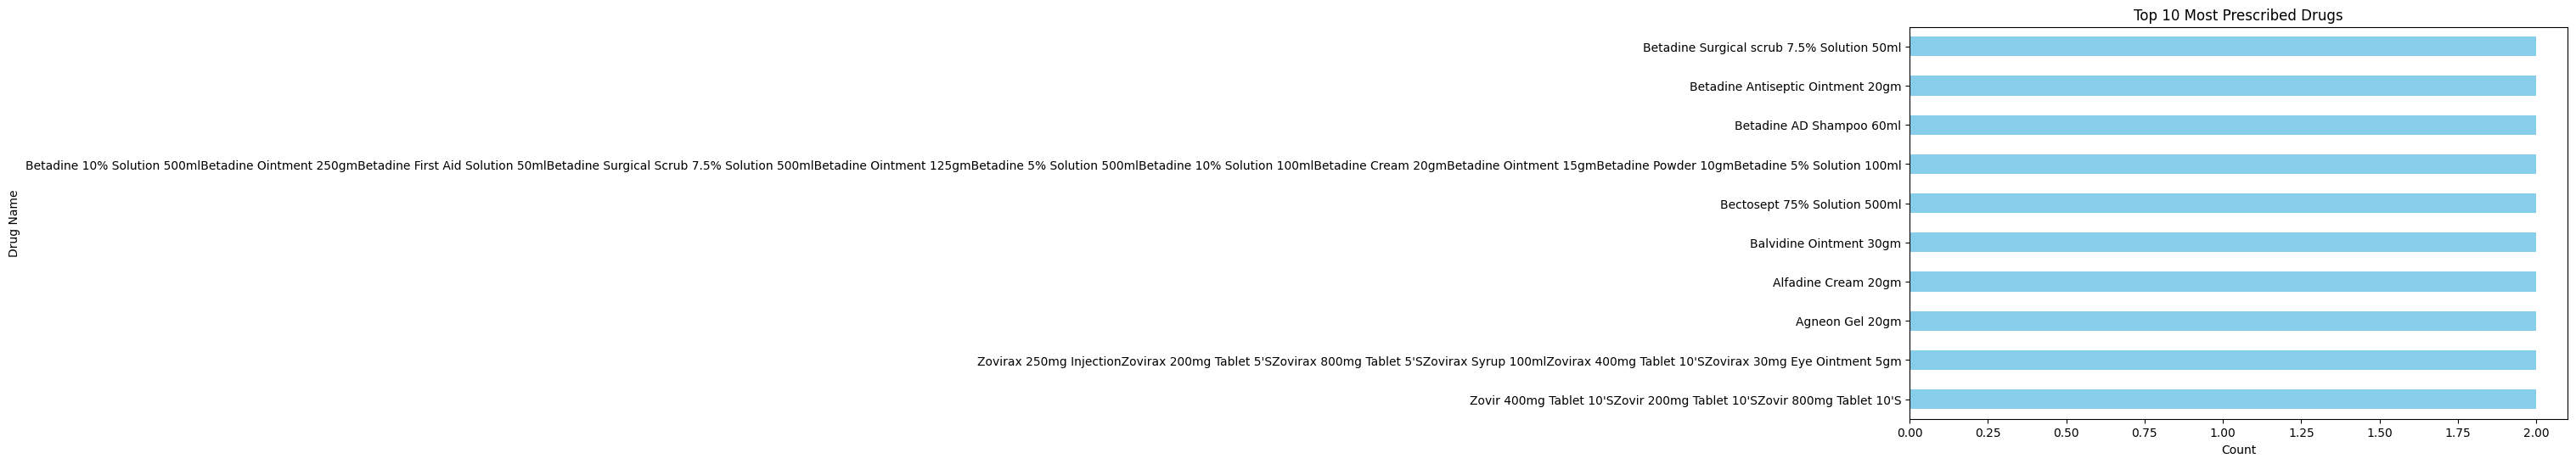

In [ ]:
plt.figure(figsize=(10,6))
df['Drug_Name'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Prescribed Drugs')
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()


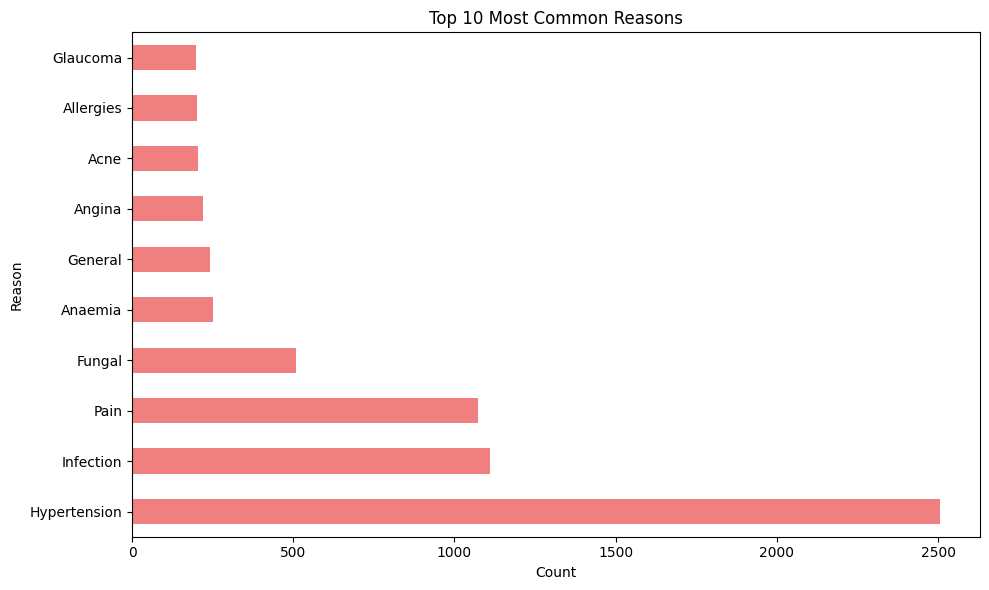

In [ ]:
plt.figure(figsize=(10,6))
df['Reason'].value_counts().head(10).plot(kind='barh', title='Top 10 Most Common Reasons', color='lightcoral')
plt.xlabel("Count")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()

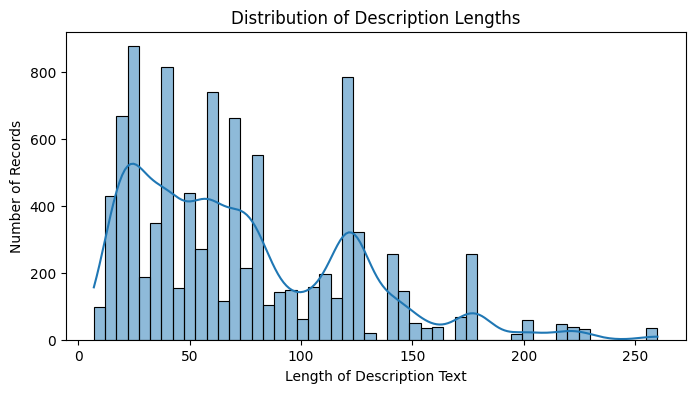

In [ ]:
# Description length analysis
df['description_length'] = df['Description'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['description_length'], bins=50, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length of Description Text')
plt.ylabel('Number of Records')
plt.show()

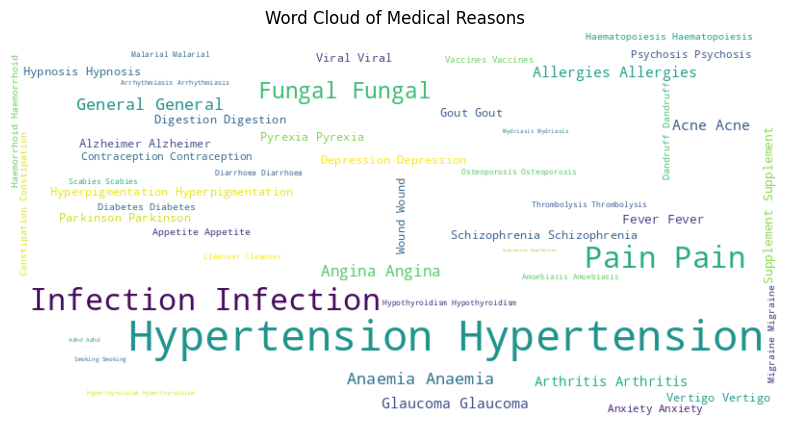

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['Reason'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Medical Reasons")
plt.show()

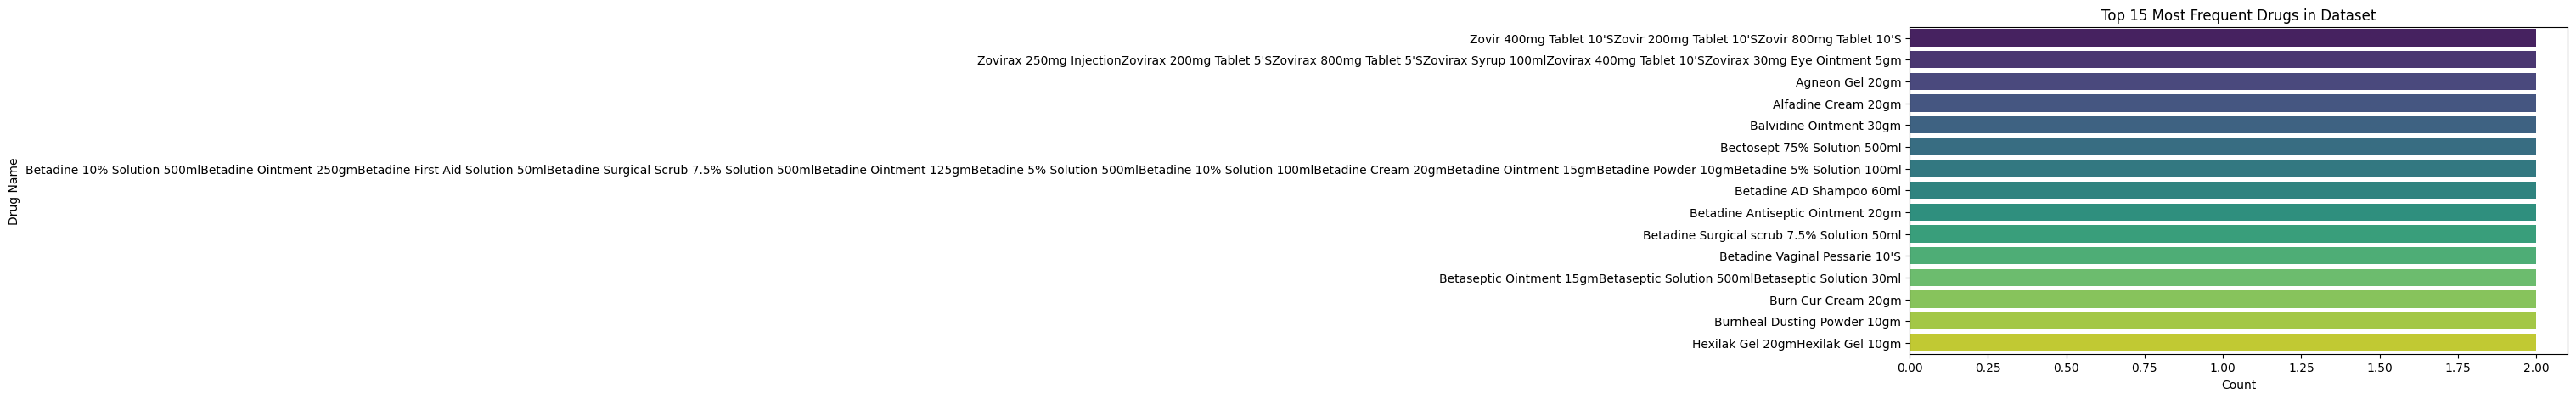

In [ ]:
plt.figure(figsize=(10,5))
top_drugs = df['Drug_Name'].value_counts().nlargest(15)

sns.barplot(x=top_drugs.values, y=top_drugs.index, palette="viridis")
plt.title("Top 15 Most Frequent Drugs in Dataset")
plt.xlabel("Count")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()

***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite ; font-size:85%; text-align:left">

<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>

####🔸 The most commonly prescribed drugs occur only **twice each**, showing high uniqueness in **Drug_Name**. This suggests a **wide variety of medicines** in the dataset.<br>
####🔸 The top 10 reasons include **Hypertension**, **Infection**, and **Pain**, which occur very frequently — with **Hypertension alone appearing ~2500 times**.<br>
####🔸 The **Description** lengths mostly fall between **30 and 100 characters**, with some reaching up to **250 characters** — making this text suitable for TF-IDF vectorization.<br>
####🔸 The word cloud shows **Hypertension**, **Infection**, **Pain**, and **Fungal** as the most prominent keywords, which aligns with the bar chart analysis of reasons.<br>
####🔸 The drug frequency plot again confirms **Oral-related Zovirax variants and Betadine products** appear more than others, but only marginally — reinforcing the **imbalance in classes** and diversity of entries.<br>

</div>

***

## **Step 5: Rule-based Label Creation for Drug Type**

####In this step, we manually classify each drug into its respective type (e.g., Oral, Topical, Injectable) using simple rule-based logic. This helps us generate the target variable **Drug_Type**, which we’ll use later for training our classification models.

In [ ]:
print(df['Drug_Name'].value_counts())

Drug_Name
Zovir 400mg Tablet 10'SZovir 200mg Tablet 10'SZovir 800mg Tablet 10'S                                                                               2
Zovirax 250mg InjectionZovirax 200mg Tablet 5'SZovirax 800mg Tablet 5'SZovirax Syrup 100mlZovirax 400mg Tablet 10'SZovirax 30mg Eye Ointment 5gm    2
Agneon Gel 20gm                                                                                                                                     2
Alfadine Cream 20gm                                                                                                                                 2
Balvidine Ointment 30gm                                                                                                                             2
                                                                                                                                                   ..
LODIRIC 100MG TABLET 10'SLODIRIC SR 250MG CAPSULE 10'S                                    

In [ ]:
drug_counts = df['Drug_Name'].value_counts().head(20)

In [ ]:
print(df['Reason'].value_counts())

Reason
Hypertension         2505
Infection            1109
Pain                 1072
Fungal                509
Anaemia               252
General               243
Angina                219
Acne                  204
Allergies             203
Glaucoma              197
Arthritis             178
Supplement            159
Fever                 157
Pyrexia               141
Schizophrenia         139
Depression            139
Viral                 136
Wound                 133
Hypnosis              129
Alzheimer             123
Hyperpigmentation     122
Vertigo               119
Digestion             117
Parkinson             108
Gout                  107
Anxiety                97
Contraception          96
Psychosis              91
Haematopoiesis         79
Diabetes               77
Haemorrhoid            75
Migraine               70
Appetite               67
Dandruff               63
Constipation           61
Vaccines               51
Cleanser               41
Amoebiasis             37
Scabi

In [ ]:
reason_counts = df['Reason'].value_counts().head(15)

In [ ]:
# Manual or rule-based grouping
def classify_drug(drug_name):
    if "Gel" in drug_name or "Cream" in drug_name:
        return "Topical"
    elif "Tablet" in drug_name or "Capsule" in drug_name:
        return "Oral"
    elif "Injection" in drug_name:
        return "Injectable"
    elif "Syrup" in drug_name:
        return "Liquid"
    else:
        return "Other"

df['Drug_Type'] = df['Drug_Name'].apply(classify_drug)

In [ ]:
print(df['Drug_Type'].value_counts())

Drug_Type
Oral          7048
Other         1046
Topical        751
Injectable     643
Liquid         232
Name: count, dtype: int64


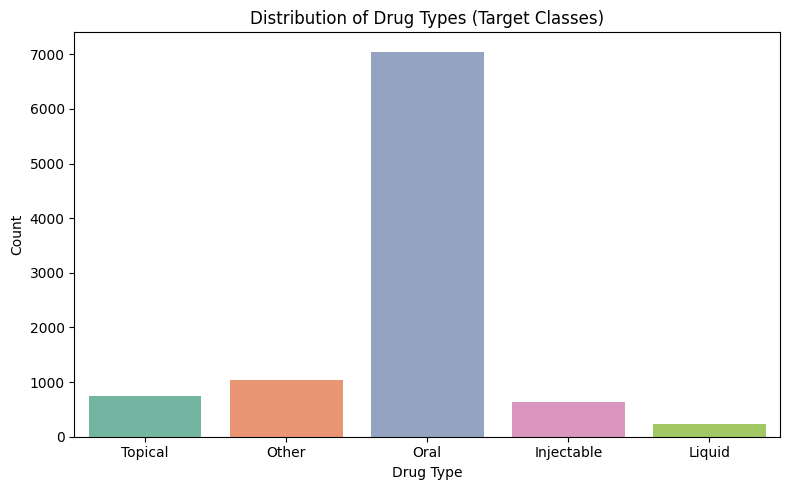

In [ ]:
# Check drug type class balance
plt.figure(figsize=(8, 5))
sns.countplot(x='Drug_Type', data=df, palette='Set2')
plt.title("Distribution of Drug Types (Target Classes)")
plt.xlabel("Drug Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# print value counts for clarity
print("Drug Type Class Counts:")
print(df['Drug_Type'].value_counts())

Drug Type Class Counts:
Drug_Type
Oral          7048
Other         1046
Topical        751
Injectable     643
Liquid         232
Name: count, dtype: int64


####<div style="border-radius:10px; padding: 15px; background-color:GhostWhite ; font-size:85%; text-align:left"> <h1 align="left"><font color=royalblue>🔸Observation: </font></h1>
####🔹 The distribution of the target variable shows that Oral drugs are the most frequently prescribed, followed by Topical and Injectable types. <br>
####🔹 There is a moderate class imbalance, which could affect model performance. To mitigate this, the class_weight='balanced' parameter was used during model training.<br>
####🔹 The success of the rule-based classification method is evident from the coherent class distributions, indicating that the logic applied (e.g., keyword-based matching like "Tablet" → Oral) worked effectively in mapping drug names to their respective categories.

</div>

## **Step 6: TF-IDF Vectorization and Data Splitting**

####In this step, we prepare the textual data for machine learning by converting it into a numerical format.

###**🔹 Key Concepts:**

####**Label Encoding** converts categorical class labels (like 'Oral', 'Topical', etc.) into numerical values. This is needed because ML models require numerical input.


####**TF-IDF Vectorization (Term Frequency–Inverse Document Frequency)** is a popular technique in Natural Language Processing (NLP). It converts text into a matrix of numerical features by scoring how important a word is in a document relative to the entire corpus.

####**Term Frequency (TF)** measures how frequently a word appears in a document.

####**Inverse Document Frequency (IDF)** down-weights common words and up-weights rare but important ones.
####This helps capture the most informative words and reduce noise from common, uninformative words like "the", "is", etc.

####**Train-Test Split:** The dataset is divided into training and testing sets using train_test_split().


In [ ]:
le = LabelEncoder()
df['Drug_Type_ID'] = le.fit_transform(df['Drug_Type'])

In [ ]:
df['text_input'] = df['Reason'] + ' ' + df['Description']

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['text_input']).toarray()
y = df['Drug_Type_ID']

In [ ]:
print(tfidf.get_feature_names_out()[0:10])

['025' '12' '16' '18' 'abdominal' 'able' 'aches' 'acid' 'acids' 'acne']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Training Samples:", X_train.shape[0])

Training Samples: 7776


###**🔸Observation:**
####🔹 TF-IDF successfully extracted relevant medical keywords such as 'acne', 'blood', 'acid', 'pressure', and 'wound', indicating it’s able to highlight health-related terms that contribute meaningfully to classification.

####🔹 The training set contains 7,776 samples, which is 80% of the total data. This provides a solid foundation for the model to learn from, while the remaining 20% is reserved for unbiased evaluation.

## **Step 7: Model Training – Random Forest Classifier**

###*What is a Random Forest Classifier?*

####Random Forest is a supervised machine learning algorithm that combines multiple decision trees to form an ensemble model. It was introduced by Leo Breiman in 2001 and is widely known for its robustness, simplicity, and accuracy across various classification and regression tasks.

####Each decision tree in the forest is trained on a random subset of the dataset (using bootstrap sampling), and at each split in the tree, a random subset of features is considered. The final prediction is made by aggregating the predictions from all the individual trees, often through majority voting (for classification) or averaging (for regression).

###Steps Performed:

####🔹Hyperparameter Tuning:
####We used GridSearchCV to find the best combination of hyperparameters like n_estimators, max_depth, and min_samples_split.

####🔹Model Training:
####Trained a RandomForestClassifier using the best parameters from the grid search.

####🔹Evaluation Metrics:
####We calculated accuracy, precision, recall, F1-score, and displayed a confusion matrix to assess model performance.

In [ ]:
# After splitting data
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid=params, cv=3, scoring='f1_weighted')

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# Use best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Accuracy Score
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.6491769547325102


In [ ]:
# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


 Classification Report:
              precision    recall  f1-score   support

  Injectable       0.24      0.60      0.35       129
      Liquid       0.14      0.57      0.23        46
        Oral       0.95      0.67      0.79      1410
       Other       0.66      0.45      0.54       209
     Topical       0.38      0.76      0.51       150

    accuracy                           0.65      1944
   macro avg       0.47      0.61      0.48      1944
weighted avg       0.81      0.65      0.70      1944



<Figure size 800x600 with 0 Axes>

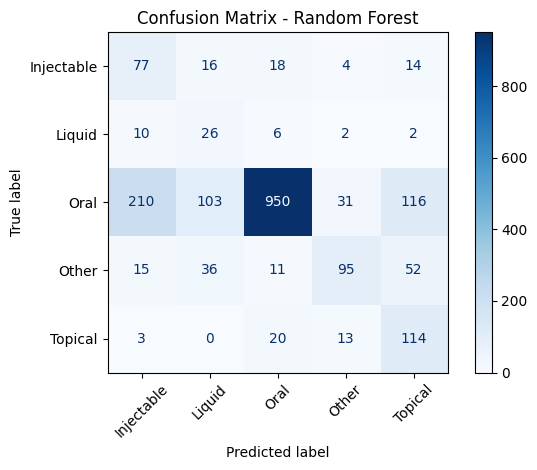

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


### **Observation:**

####🔹The Random Forest classifier shows good performance on the majority class (Oral), but moderate confusion among Injectable, Liquid, and Topical classes.

####🔹Hyperparameter tuning helped optimize model performance, but class imbalance continues to affect precision for minority classes.

####🔹The confusion matrix revealed the most misclassifications happen among similar drug forms, such as Oral ↔ Injectable or Topical ↔ Other.

####🔹This step confirms that Random Forest, with its ensemble nature and feature randomness, can extract strong patterns from complex text inputs, but further balancing or domain-specific features may improve predictions.

In [ ]:
# To establish a baseline performance, we trained a Random Forest classifier using default parameters (without any hyperparameter tuning).
# This helps evaluate how well the model performs before optimization, providing a reference point for later improvements.

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
# Predict on test set
y_pred = best_model.predict(X_test)
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.808641975308642


In [ ]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


 Classification Report:
              precision    recall  f1-score   support

  Injectable       0.89      0.19      0.32       129
      Liquid       0.78      0.15      0.25        46
        Oral       0.83      0.97      0.89      1410
       Other       0.73      0.50      0.59       209
     Topical       0.60      0.41      0.49       150

    accuracy                           0.81      1944
   macro avg       0.76      0.45      0.51      1944
weighted avg       0.80      0.81      0.78      1944



### **Observation:**

####This untuned Random Forest classifier achieved an accuracy of **~81%**, showing strong initial performance.

####- It performed best on the **Oral** drug class (F1-score: 0.89).
####- However, the model struggled with minority classes like **Injectable**, **Liquid**, and **Topical**, which had much lower precision and recall.
####- This imbalance suggests the need for class weighting or additional optimization, which we address in the next step.

####This baseline reinforces the capability of ensemble models in handling text-based classification, even without tuning.


## **Step 8: Logistic Regression Model**

####**Logistic Regression** is a linear model used for classification tasks. It works by estimating the probability that a given input belongs to a particular class using the logistic (sigmoid) function.

####In multi-class problems, Logistic Regression applies the One-vs-Rest approach where it builds one binary classifier per class. It is simple, interpretable, and fast but can struggle with complex patterns or non-linear decision boundaries.

In [ ]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Predict
log_preds = log_model.predict(X_test)

In [ ]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("\n Classification Report:")
print(classification_report(y_test, log_preds, target_names=le.classes_))

Logistic Regression Accuracy: 0.6075102880658436

 Classification Report:
              precision    recall  f1-score   support

  Injectable       0.23      0.64      0.34       129
      Liquid       0.14      0.59      0.23        46
        Oral       0.96      0.60      0.74      1410
       Other       0.62      0.48      0.54       209
     Topical       0.34      0.81      0.48       150

    accuracy                           0.61      1944
   macro avg       0.46      0.62      0.47      1944
weighted avg       0.81      0.61      0.66      1944



<Figure size 800x600 with 0 Axes>

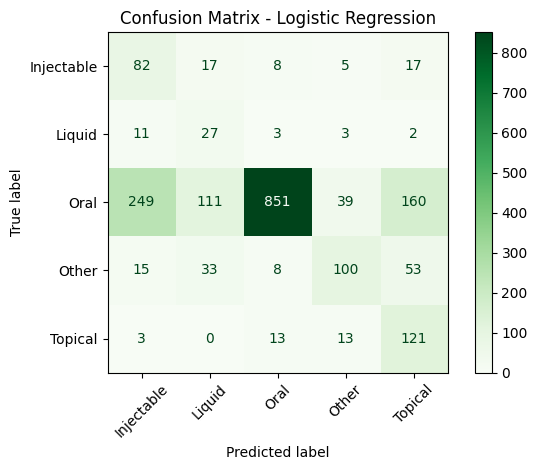

In [ ]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, log_preds)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=le.classes_)

plt.figure(figsize=(8,6))
disp_log.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

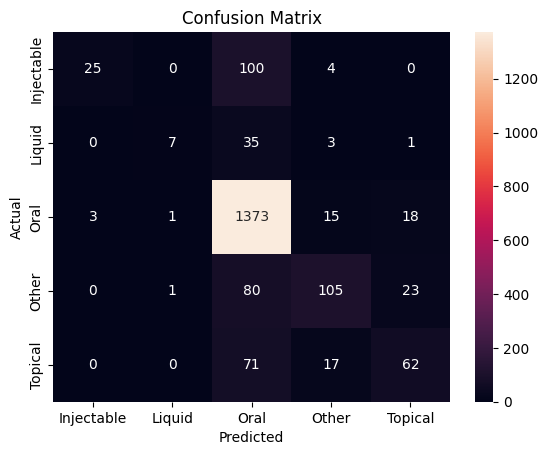

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


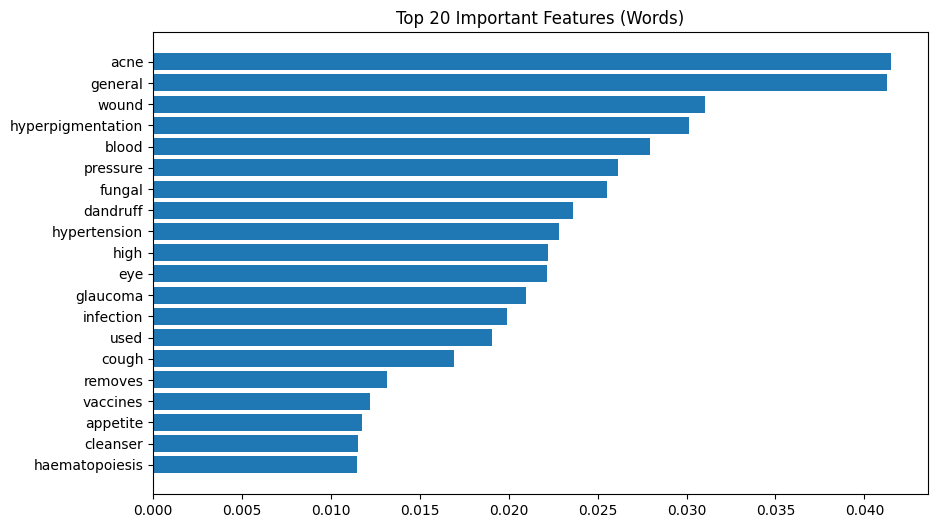

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[-20:][::-1]
top_features = [tfidf.get_feature_names_out()[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Top 20 Important Features (Words)")
plt.barh(top_features, importances[indices])
plt.gca().invert_yaxis()
plt.show()


###**Observation:**

- Random Forest achieved a higher accuracy (64.9%) than Logistic Regression (60.8%), demonstrating stronger classification ability for this multi-class problem.

- Random Forest classified the “Oral” class with high precision but showed confusion between “Injectable” and “Oral”, as well as between “Topical” and “Other”.

- Logistic Regression also performed best on the “Oral” class but over-predicted it, misclassifying a large portion of “Injectable”, “Topical”, and “Liquid” samples.

- The confusion matrix of Logistic Regression highlighted poor separation between minority classes, whereas Random Forest handled class imbalance more effectively using class_weight='balanced'.

- The top 20 most important features revealed that medically meaningful words like “acne”, “wound”, “blood”, “pressure”, and “hyperpigmentation” significantly influenced predictions.

- These features suggest the model is learning interpretable patterns from the text, helping it differentiate drug forms based on relevant symptom or usage-related vocabulary.

## **Step 9: Re-Training, Accuracy Comparison & Final Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(class_weight='balanced', random_state=42)
best_model.fit(X_train, y_train)

# Re-evaluate
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6491769547325102


In [ ]:
print("\n Classification Report od Random Forest:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


 Classification Report od Random Forest:
              precision    recall  f1-score   support

  Injectable       0.24      0.60      0.35       129
      Liquid       0.14      0.57      0.23        46
        Oral       0.95      0.67      0.79      1410
       Other       0.66      0.45      0.54       209
     Topical       0.38      0.76      0.51       150

    accuracy                           0.65      1944
   macro avg       0.47      0.61      0.48      1944
weighted avg       0.81      0.65      0.70      1944



In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

Logistic Regression Accuracy: 0.6075102880658436


In [ ]:
print("\n Classification Report of Logistic Regression:")
print(classification_report(y_test, log_preds, target_names=le.classes_))


 Classification Report of Logistic Regression:
              precision    recall  f1-score   support

  Injectable       0.23      0.64      0.34       129
      Liquid       0.14      0.59      0.23        46
        Oral       0.96      0.60      0.74      1410
       Other       0.62      0.48      0.54       209
     Topical       0.34      0.81      0.48       150

    accuracy                           0.61      1944
   macro avg       0.46      0.62      0.47      1944
weighted avg       0.81      0.61      0.66      1944



In [ ]:
print(f"Random Forest Accuracy     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_preds):.4f}")

Random Forest Accuracy     : 0.6492
Logistic Regression Accuracy: 0.6075


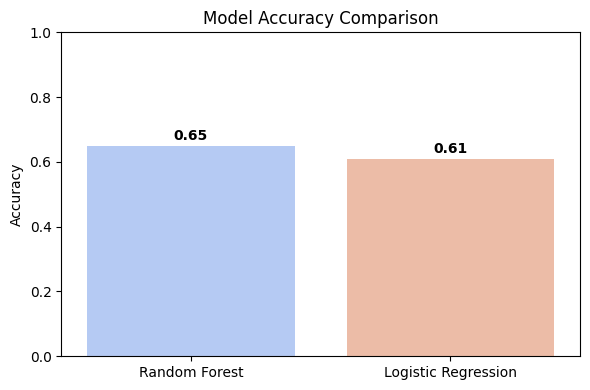

In [ ]:
# Final Accuracy Comparison
rf_acc = accuracy_score(y_test, y_pred)
log_acc = accuracy_score(y_test, log_preds)

# Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(x=['Random Forest', 'Logistic Regression'], y=[rf_acc, log_acc], palette='coolwarm')
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
for i, acc in enumerate([rf_acc, log_acc]):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

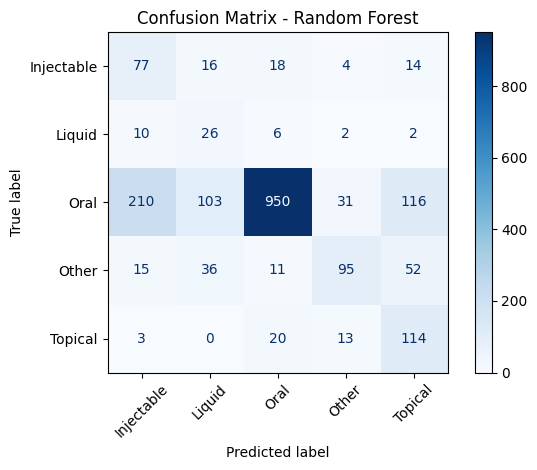

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Display it
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
plt.figure(figsize=(10,10))
disp_rf.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

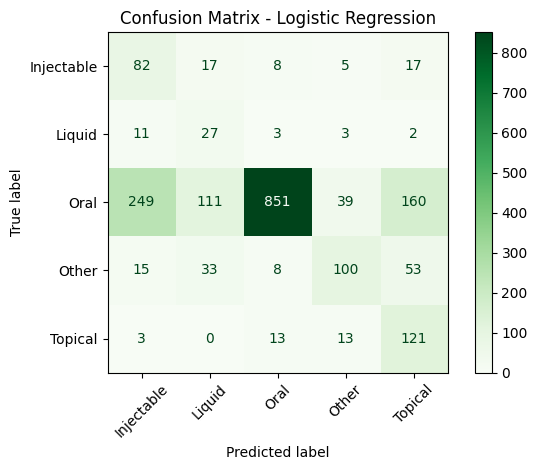

In [ ]:
# Confusion matrix for logistic regression
cm_log = confusion_matrix(y_test, log_preds)

disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=le.classes_)
plt.figure(figsize=(10,10))
disp_log.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


### **Observation:**
- The Random Forest classifier achieved better accuracy (~ 0.649) than Logistic Regression (~ 0.607), showing stronger performance on this multi-class text classification task.

- Random Forest handles imbalanced classes more effectively, especially improving recall for classes like Injectable and Topical, though some class confusion still exists.

- Logistic Regression tends to over-predict the 'Oral' class and exhibits higher confusion among minority drug types, limiting its overall reliability.

- The confusion matrices highlight that Random Forest delivers better class-wise separation compared to Logistic Regression, which struggles particularly with Injectable ↔ Topical misclassifications.

- The bar chart visualization further confirms that Random Forest outperforms Logistic Regression in terms of accuracy and consistency.

- Based on all evaluations, Random Forest with class_weight='balanced' is selected as the final model due to its superior accuracy, class handling, and interpretability.



## **Step 10: Sample Prediction and Model Saving**

In [ ]:
sample = ["Used to treat skin inflammation and bacterial infection"]
sample_vec = tfidf.transform(sample).toarray()
pred = best_model.predict(sample_vec)
print("Predicted Drug Type:", le.inverse_transform(pred))


Predicted Drug Type: ['Injectable']


In [ ]:
# Show probabilities
probs = best_model.predict_proba(sample_vec)
for label, prob in zip(le.classes_, probs[0]):
    print(f"{label}: {prob:.4f}")


Injectable: 0.3683
Liquid: 0.2856
Oral: 0.2066
Other: 0.0772
Topical: 0.0623


To simulate a real-world prediction, we tested our trained model with the following sample input:

> **"Used to treat skin inflammation and bacterial infection"**

🔹 The model predicted the drug type as **Injectable**, which aligns with cases where severe infections are often treated via injectable antibiotics.

To better understand the model’s decision-making, we also extracted the class-wise prediction probabilities.

🔹 As seen, **Injectable** had the highest confidence score (36.83%), with **Liquid** and **Oral** close behind. This reflects some overlap in how drug types can relate to similar symptom descriptions — a common challenge in medical text classification.

In [ ]:
import joblib

# Save the final model and components
joblib.dump(best_model, "drug_classifier.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

Finally, we saved the following components using **joblib** for deployment:

- **drug_classifier.pkl** – The trained model  
- **tfidf_vectorizer.pkl** – The vectorizer for converting text to features  
- **label_encoder.pkl** – The label encoder for decoding predicted class IDs

These files are ready to be integrated into a deployment framework like **Streamlit** or **Flask** for real-time use.
